##  Medical Insurance Costs Using Linear Regression

This dataset contains the following features:

1. Age: The age of the individual (numerical).
2. Sex: The gender of the individual (categorical: 'male' or 'female').
3. BMI (Body Mass Index): A numerical value representing the body mass index of the individual.
4. Number of Children: The number of children/dependents covered by the insurance (numerical).
5. Smoker: A binary feature indicating whether the individual is a smoker or not ('yes' or 'no').
6. Region: The geographical region of the individual (categorical: 'northwest', 'northeast', 'southwest', 'southeast').
7. Medical Insurance Cost: The target variable, representing the individual's medical insurance cost.









### Objective of this dataset
The major goal of this dataset is to create a regression model that predicts medical insurance costs based on the features provided. This can assist insurance companies in assessing risks and determining suitable insurance prices for various persons.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [6]:
df_cost=pd.read_csv("C:/Users/lenovo/Downloads/insurance.csv")

In [7]:
df_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# shape of the data
df_cost.shape

(1338, 7)

In [9]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# description of the data
df_cost.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
df_cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df_cost.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
df_cost.duplicated().sum()

1

In [14]:
df_cost[df_cost.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
df_cost.drop([195],axis=0,inplace=True)

In [16]:
df_cost.shape

(1337, 7)

In [17]:
df_cost.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
df_categorical=['sex','smoker','region']
df_numerical=['age','bmi','children']

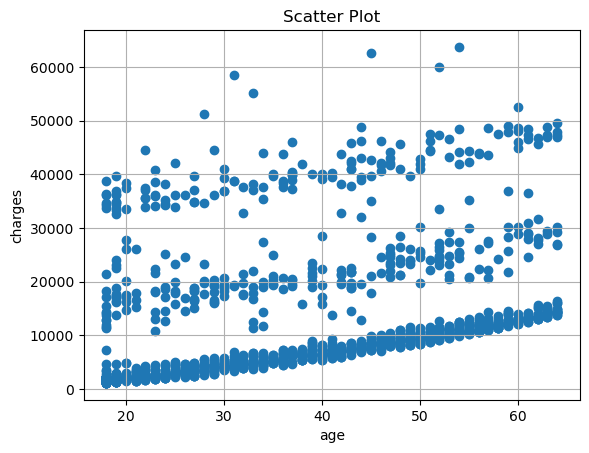

In [19]:
# Assuming you have two arrays 'x' and 'y' representing the data points
x = df_cost['age']
y = df_cost['charges']

# Create the scatter plot
plt.grid()
plt.scatter(x, y)

# Add labels and title
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Scatter Plot')

# Show the plot
plt.show()


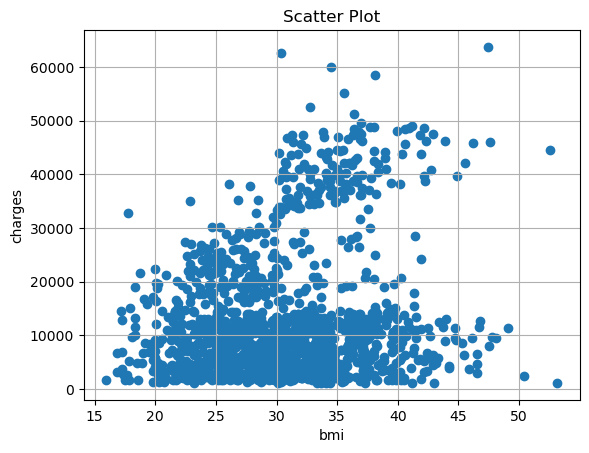

In [20]:
# Assuming you have two arrays 'x' and 'y' representing the data points
x = df_cost['bmi']
y = df_cost['charges']

# Create the scatter plot
plt.grid()
plt.scatter(x, y)

# Add labels and title
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('Scatter Plot')

# Show the plot
plt.show()


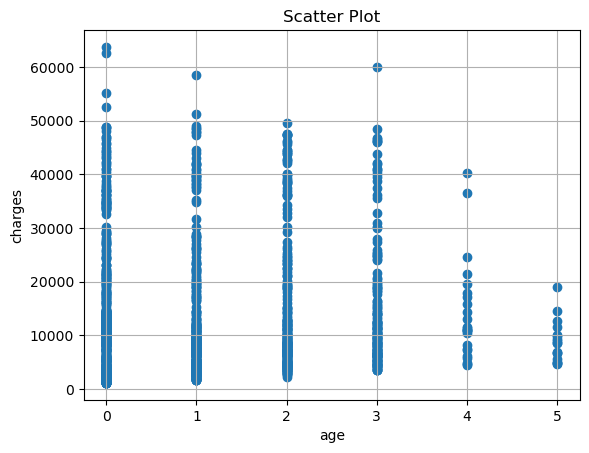

In [21]:
# Assuming you have two arrays 'x' and 'y' representing the data points
x = df_cost['children']
y = df_cost['charges']

# Create the scatter plot
plt.grid()
plt.scatter(x, y)

# Add labels and title
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Scatter Plot')

# Show the plot
plt.show()


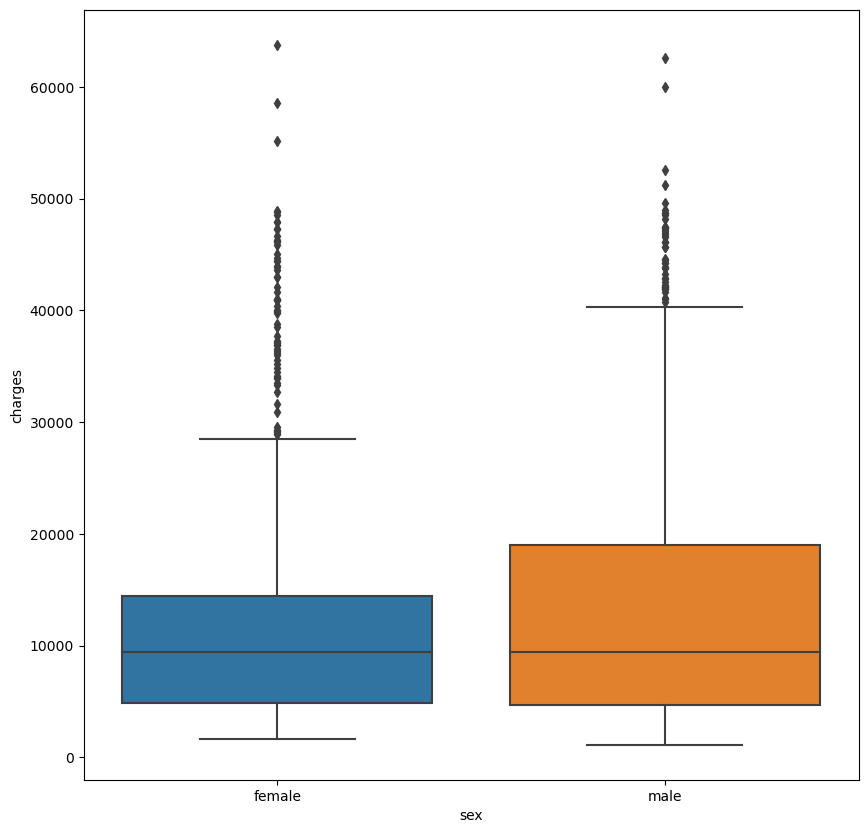

In [22]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='sex', y='charges', data=df_cost)
plt.show()

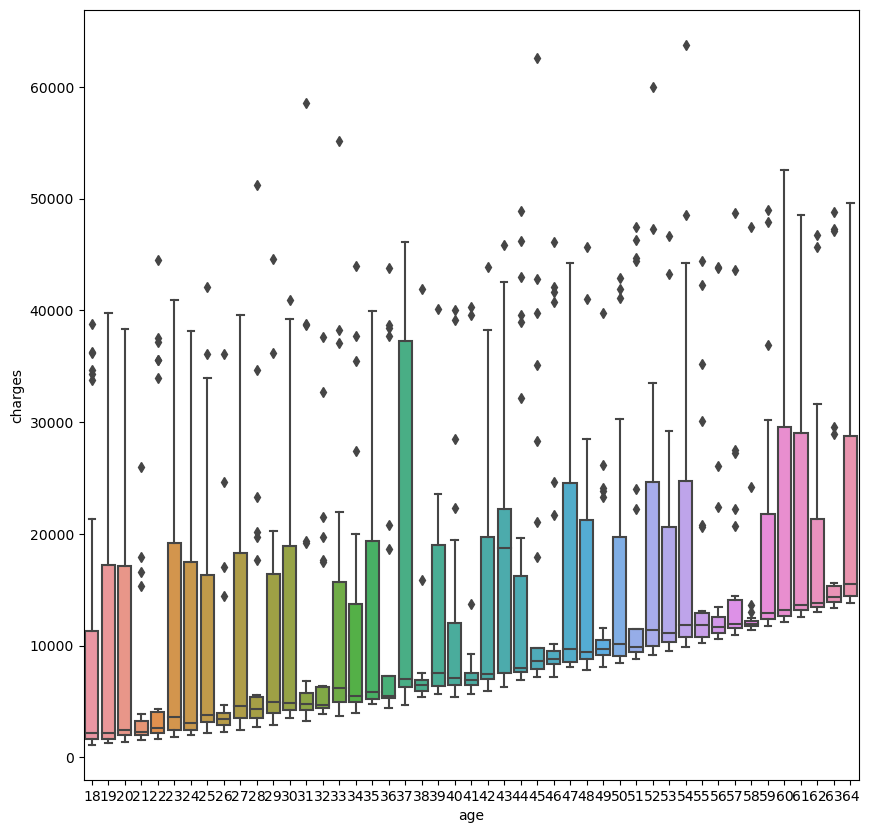

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='age', y='charges', data=df_cost)
plt.show()

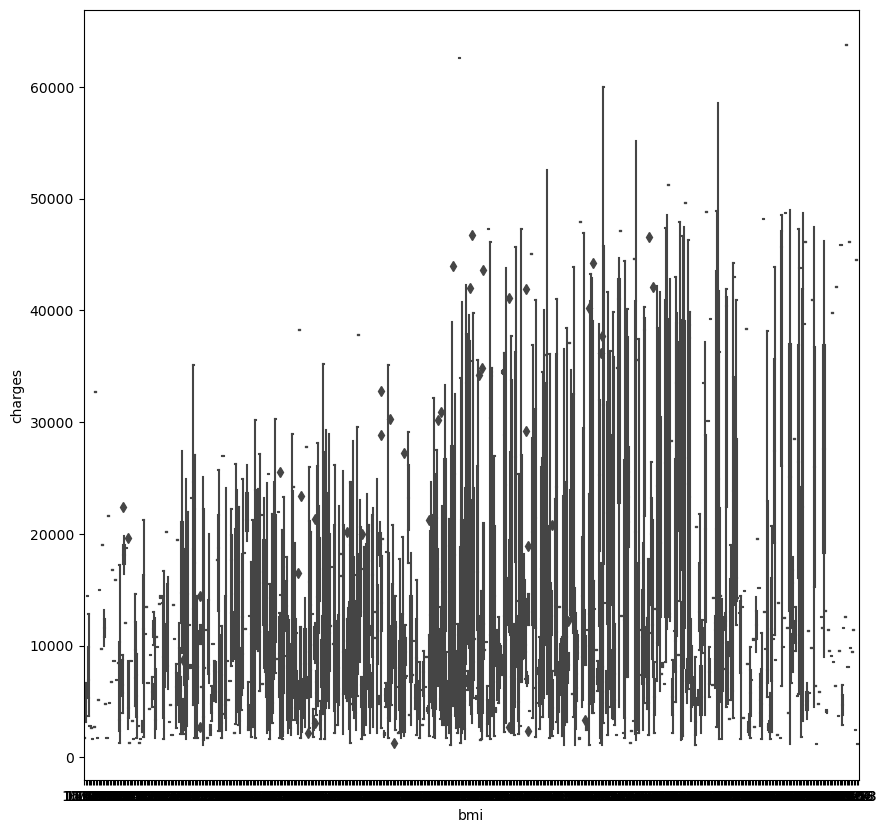

In [24]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='bmi', y='charges', data=df_cost)
plt.show()

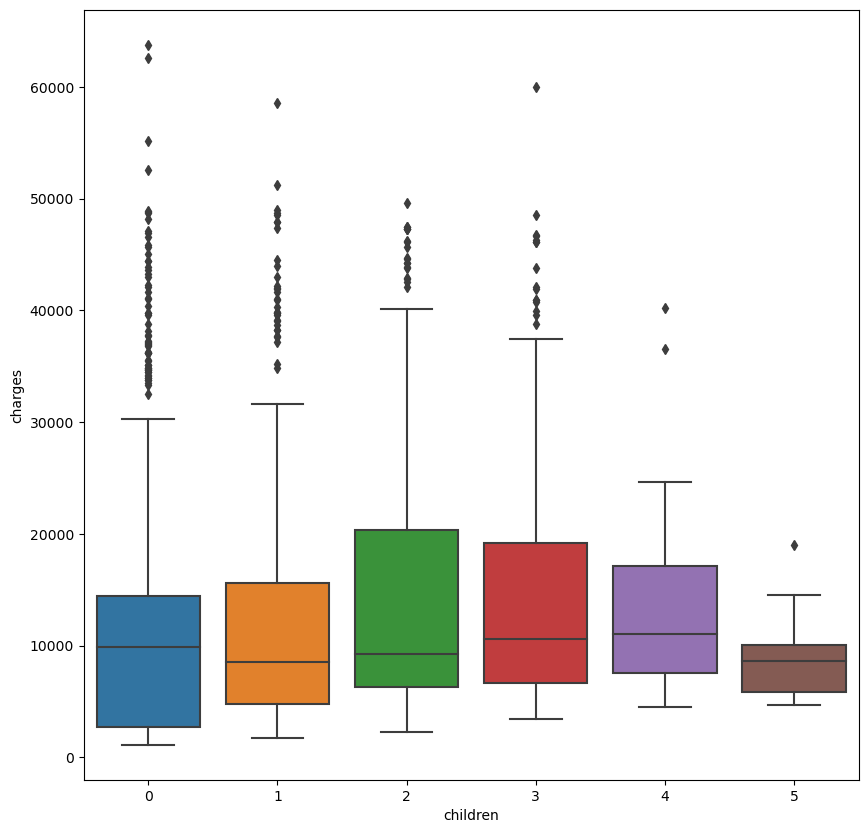

In [25]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='children', y='charges', data=df_cost)
plt.show()

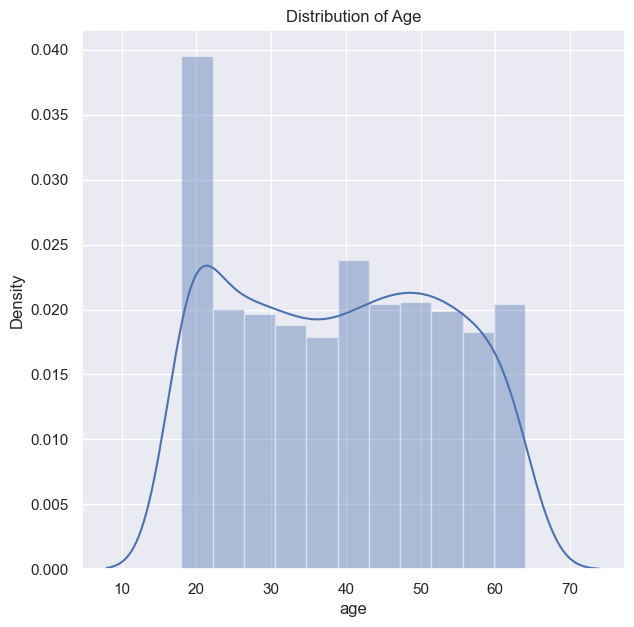

In [26]:
# Distribution of Age
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(df_cost["age"])
plt.title('Distribution of Age')
plt.show()

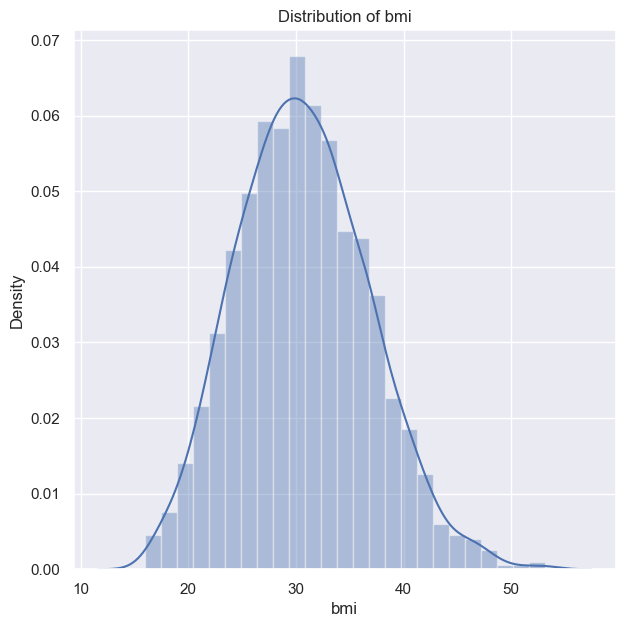

In [27]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(df_cost["bmi"])
plt.title('Distribution of bmi')
plt.show()

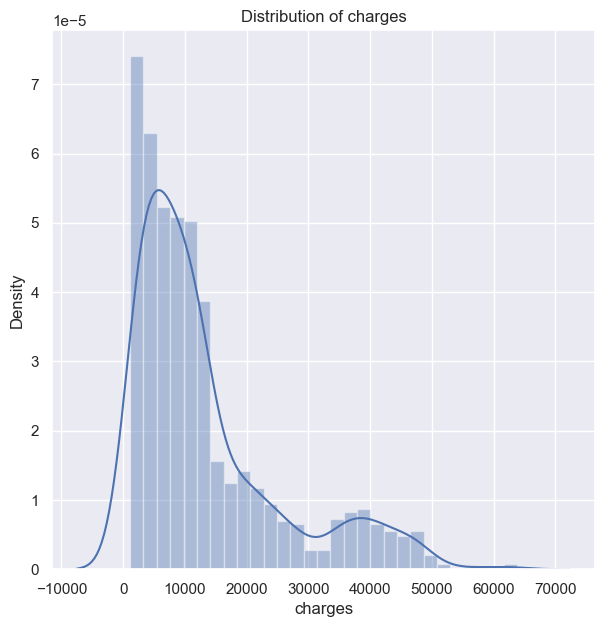

In [28]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(df_cost["charges"])
plt.title('Distribution of charges')
plt.show()

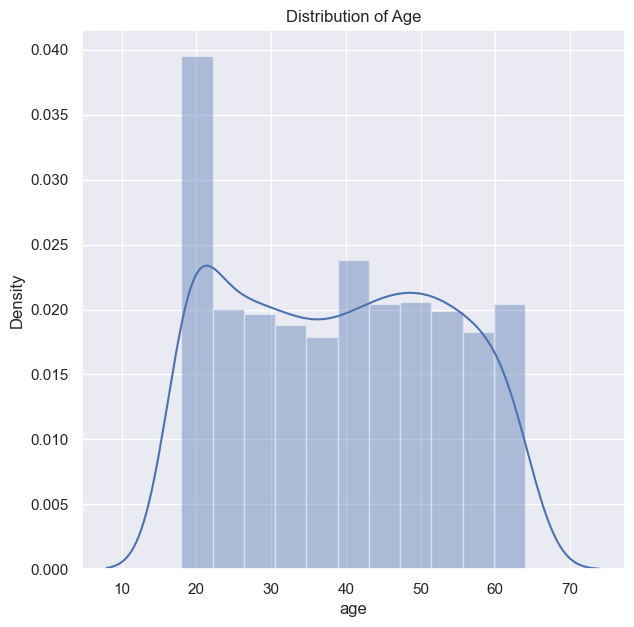

In [29]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(df_cost["age"])
plt.title('Distribution of Age')
plt.show()

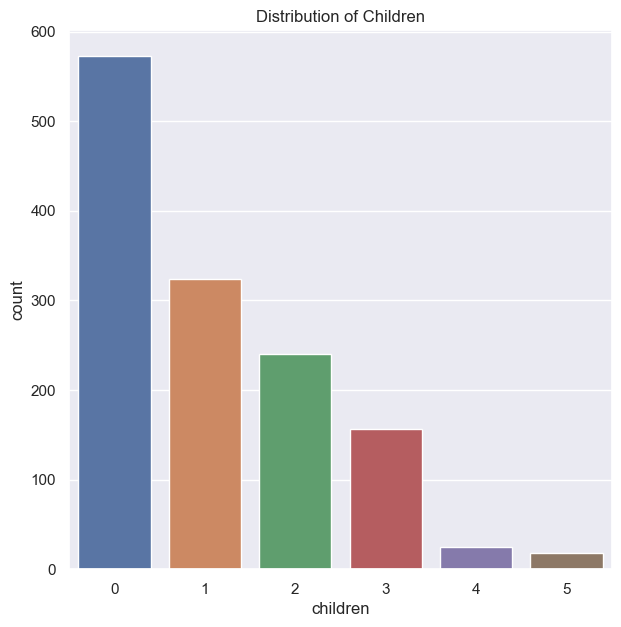

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [30]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(df_cost["children"])
plt.title('Distribution of Children')
plt.show()
df_cost['children'].value_counts()

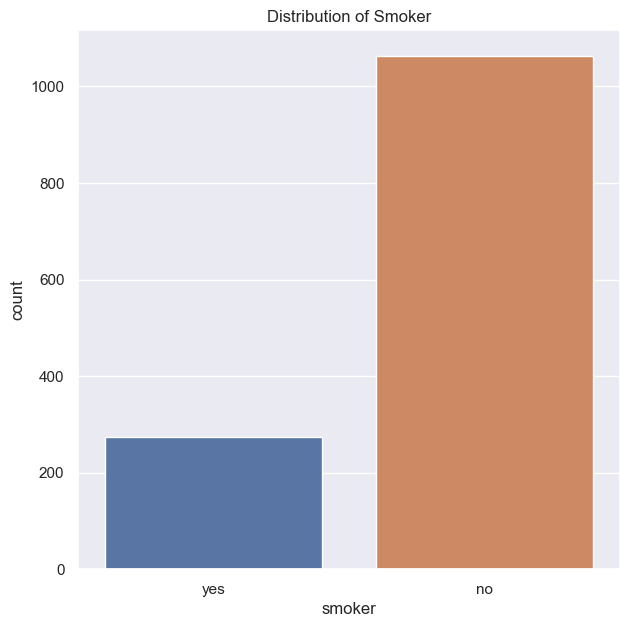

no     1063
yes     274
Name: smoker, dtype: int64

In [31]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(df_cost["smoker"])
plt.title('Distribution of Smoker')
plt.show()
df_cost['smoker'].value_counts()

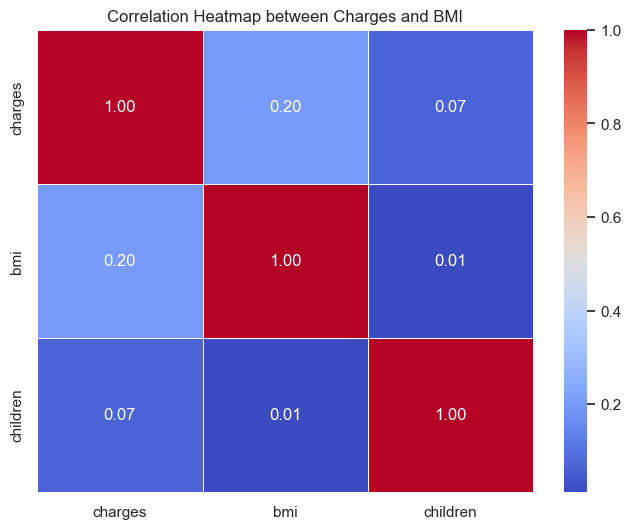

In [32]:

data_for_heatmap = df_cost[['charges', 'bmi','children']]

# Calculate the correlation matrix
correlation_matrix = data_for_heatmap.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Charges and BMI')
plt.show()


Text(0.5, 1.0, 'Distribution of Charges')

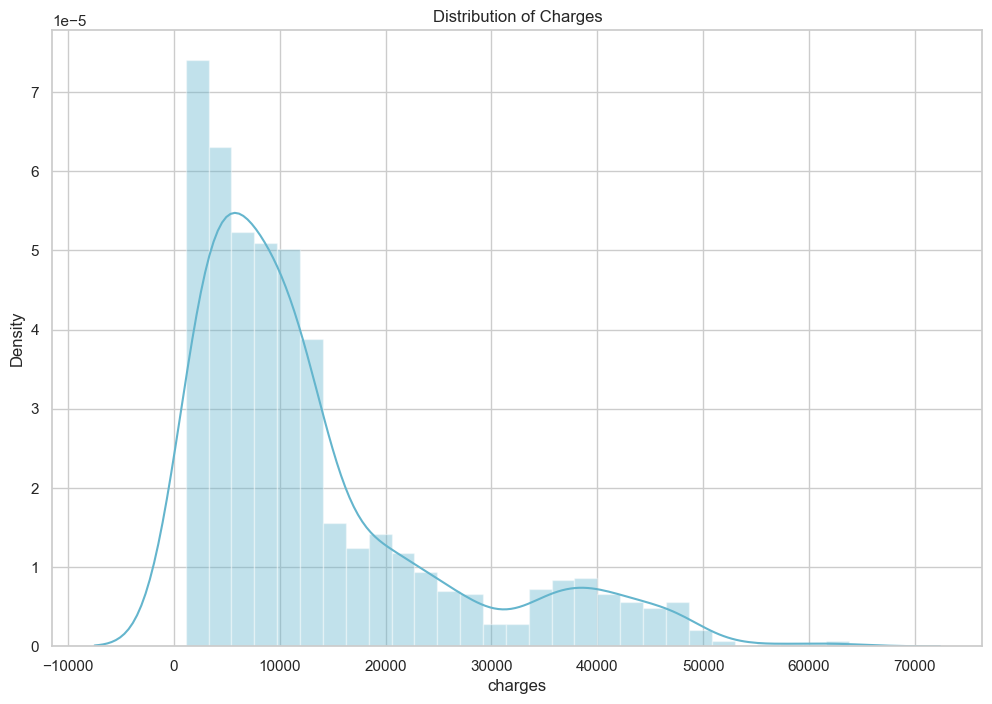

In [34]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df_cost['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

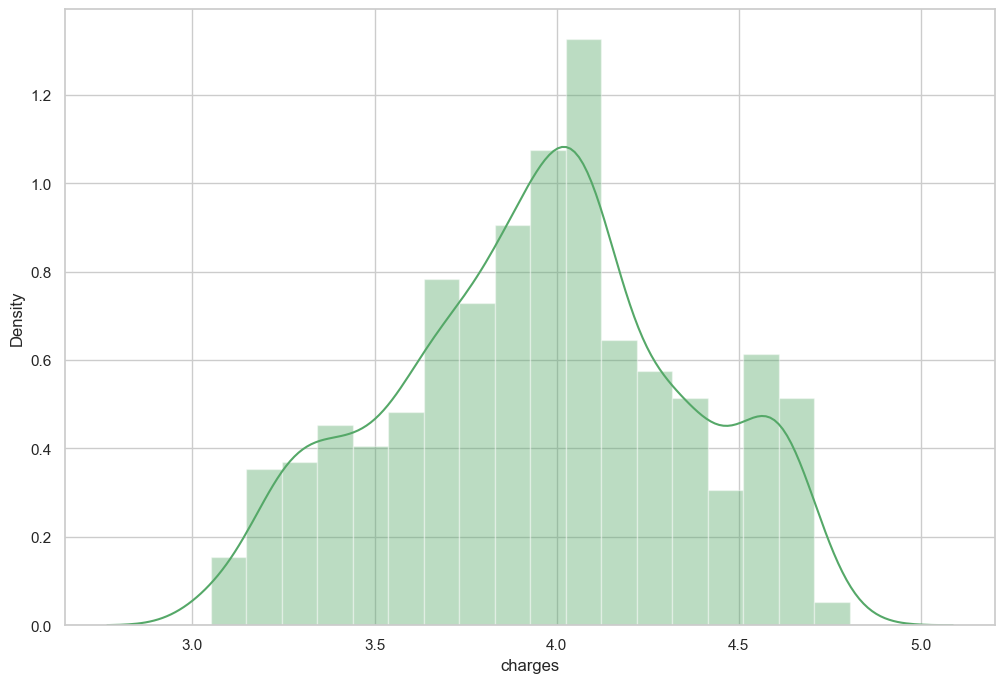

In [36]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df_cost['charges']), kde = True, color = 'g' )

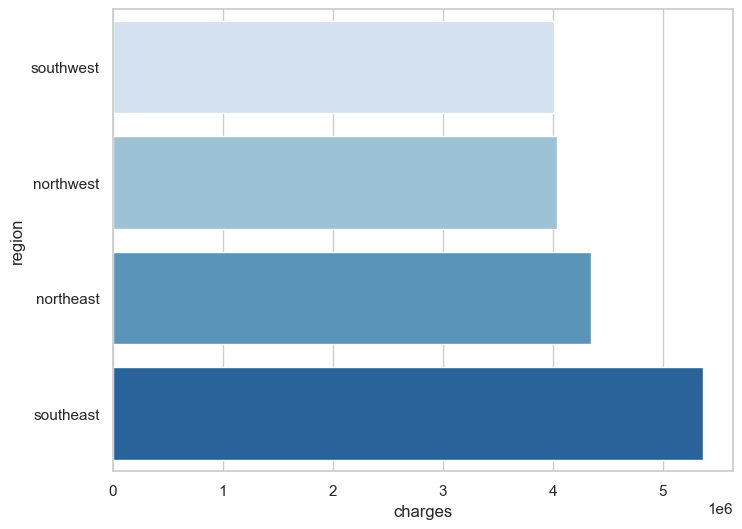

In [38]:
charges = df_cost['charges'].groupby(df_cost.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')


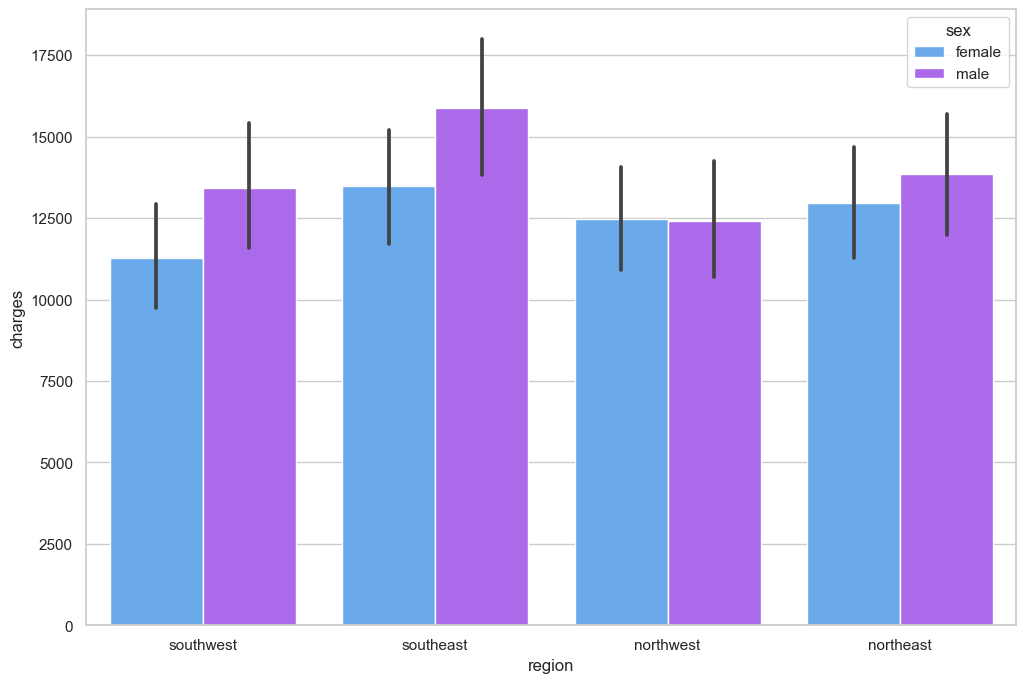

In [39]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df_cost, palette='cool')

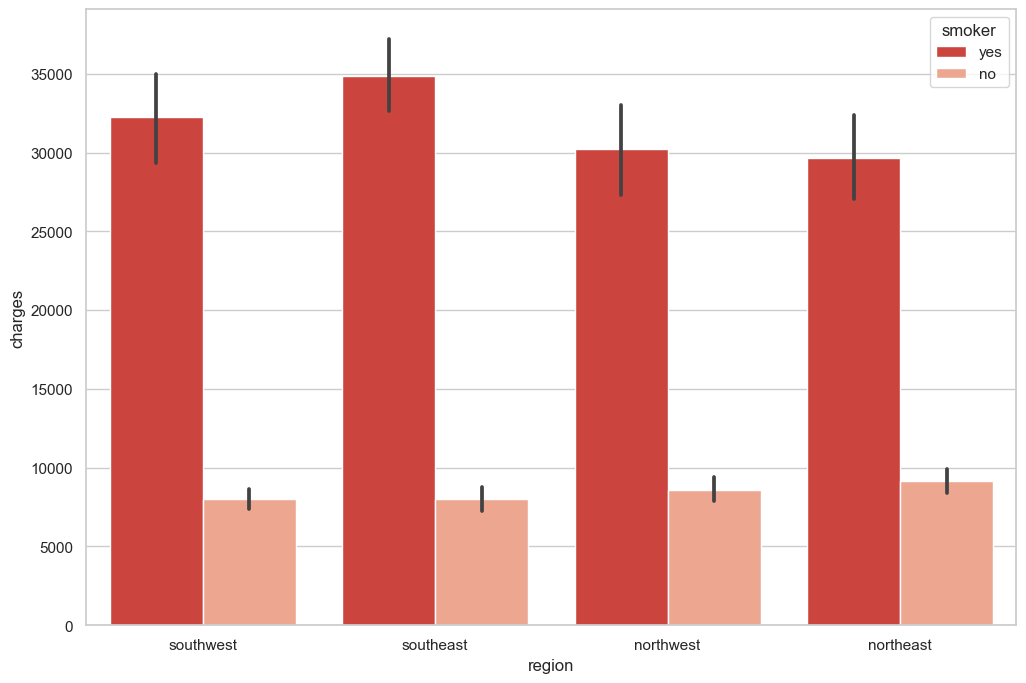

In [40]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df_cost, palette='Reds_r')

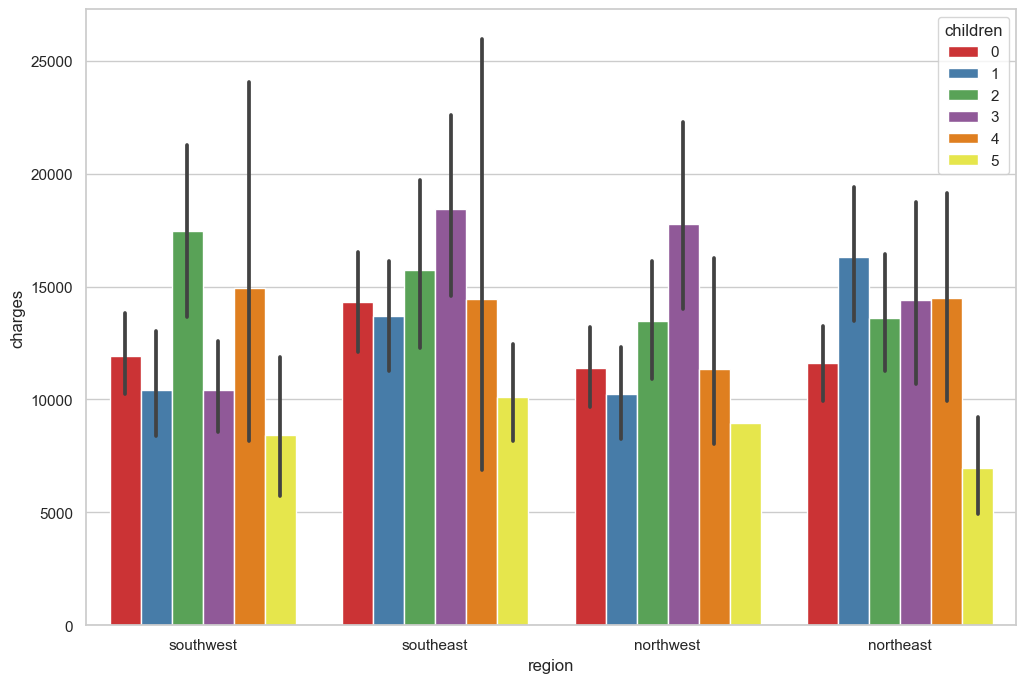

In [41]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df_cost, palette='Set1')

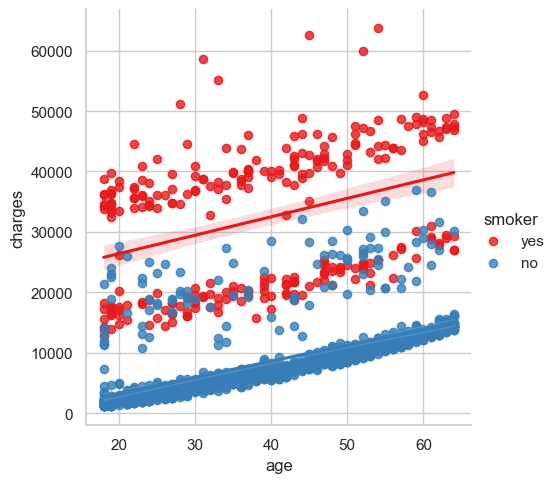

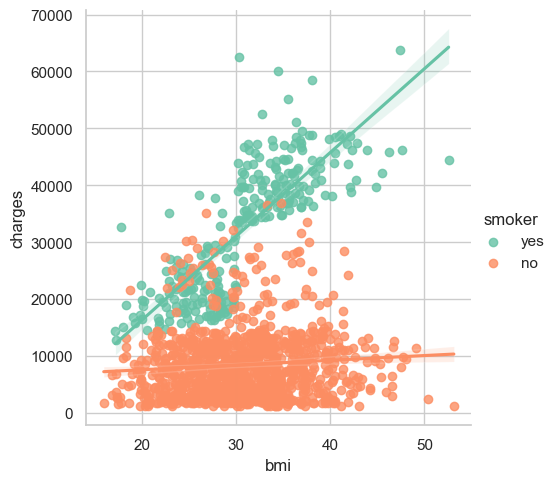

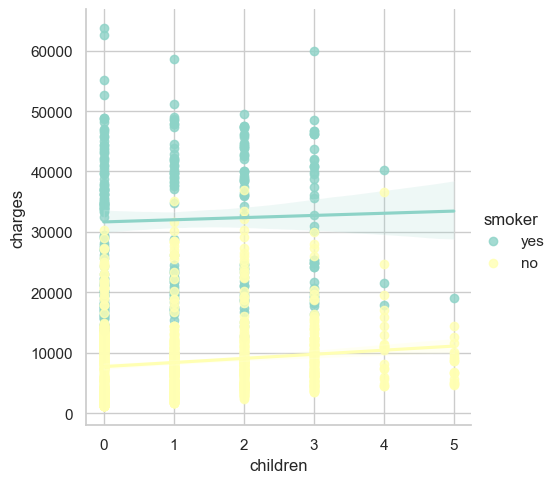

In [42]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df_cost, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df_cost, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df_cost, hue='smoker', palette='Set3')

In [44]:
##Converting objects labels into categorical
df_cost[['sex', 'smoker', 'region']] = df_cost[['sex', 'smoker', 'region']].astype('category')
df_cost.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [49]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df_cost.sex.drop_duplicates())
df_cost.sex = label.transform(df_cost.sex)
label.fit(df_cost.smoker.drop_duplicates())
df_cost.smoker = label.transform(df_cost.smoker)
label.fit(df_cost.region.drop_duplicates())
df_cost.region = label.transform(df_cost.region)
df_cost.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

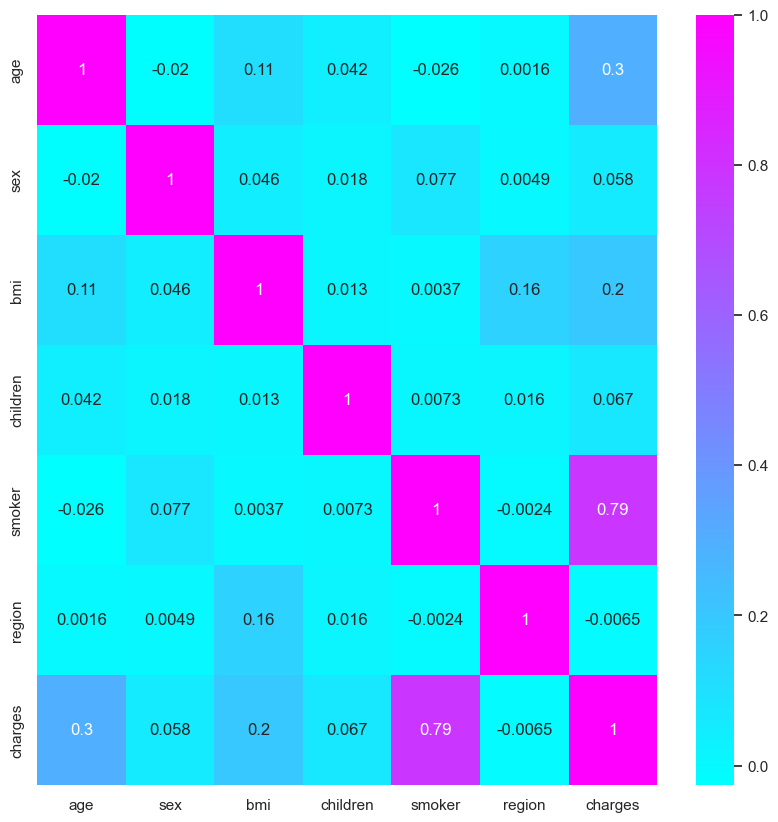

In [50]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_cost.corr(), annot=True, cmap='cool')

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 4139.770847694628
Mean Squared Error: 37539056.40594906
R-squared: 0.7787597428949407


In [57]:
# Coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [   249.36920081    318.83313097    569.16600988     34.00143307
    -34.00143307 -11746.2614577   11746.2614577     727.72682432
    127.59469372   -508.83231754   -346.4892005 ]
Intercept: -12.83474651355391


In [58]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 21129471.025779754


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-squared score:", r2_lr)


Linear Regression - Mean Squared Error: 37539056.40594906
Linear Regression - R-squared score: 0.7787597428949407


In [62]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the decision tree regression model
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regression - Mean Squared Error:", mse_dt)
print("Decision Tree Regression - R-squared score:", r2_dt)


Decision Tree Regression - Mean Squared Error: 44076994.13094318
Decision Tree Regression - R-squared score: 0.7402277401836169


In [64]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the random forest regression model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression - Mean Squared Error:", mse_rf)
print("Random Forest Regression - R-squared score:", r2_rf)


Random Forest Regression - Mean Squared Error: 24756703.967467982
Random Forest Regression - R-squared score: 0.8540938405162348
